In [ ]:
from google.colab import files
import pandas as pd
import numpy as np


In [ ]:
uploaded = files.upload()

Saving electricityrecord_save2.csv to electricityrecord_save2.csv


In [ ]:
df=pd.read_csv('electricityrecord_save2.csv')

In [ ]:
df.drop(['Unnamed: 0'],inplace=True , axis=1)

In [ ]:
df

,month,amount,total_unit_consumed,off_peak,peak,load,no_of_bulb,no_of_fans,no_of_ac,year,season
0,9,9947,508,508.0,0.00,2.0,18.0,4.0,1.000000,2021.0,2
1,11,5033,302,302.0,0.00,2.0,18.0,4.0,0.000000,2021.0,1
2,10,7553,417,300.0,116.05,1.0,9.0,4.0,1.000000,2021.0,1
3,6,30092,1441,755.0,655.00,4.0,52.0,9.0,2.000000,2019.0,2
4,11,389,0,0.0,0.00,1.0,7.0,3.0,1.459971,2021.0,1
...,...,...,...,...,...,...,...,...,...,...,...
683,8,11450,586,300.0,286.00,3.0,12.0,7.0,1.000000,2021.0,2
684,11,11108,521,300.0,221.00,3.0,12.0,7.0,1.000000,2021.0,1
685,10,9364,521,300.0,221.00,3.0,12.0,7.0,1.000000,2021.0,1
686,9,9927,521,300.0,221.00,3.0,12.0,7.0,1.000000,2021.0,2


In [ ]:
df['amount']=df['amount'].str.replace(',','')

In [ ]:
df.to_csv('finalFyp2.csv')

In [ ]:
df['off_peak']=pd.to_numeric(df['off_peak'])
#df['off_peak'] .astype(int)

In [ ]:
X,y=df[['month', 'off_peak', 'peak', 'load','no_of_bulb', 'no_of_fans', 'no_of_ac']].values, df[['amount', 'total_unit_consumed']].values

print('Features:',X[:10], '\nLabels:', y[:10], sep='\n')

Features:
[[  9.         508.           0.           2.          18.
    4.           1.        ]
 [ 11.         302.           0.           2.          18.
    4.           0.        ]
 [ 10.         300.         116.05         1.           9.
    4.           1.        ]
 [  6.         755.         655.           4.          52.
    9.           2.        ]
 [ 11.           0.           0.           1.           7.
    3.           1.45997089]
 [ 10.         200.          73.           4.          14.
    5.           1.        ]
 [  8.         300.         354.           4.          14.
    5.           1.        ]
 [ 10.         200.          17.           3.          10.
    8.           1.        ]
 [ 10.         463.          13.           1.           8.
    7.           3.        ]
 [  4.         200.          14.           1.           7.
    5.           0.        ]]

Labels:
[['9947' 508]
 ['5033' 302]
 ['7553' 417]
 ['30092' 1441]
 ['389' 0]
 ['3477' 273]
 ['13721' 654]
 [

In [ ]:
df['season'].dtype

dtype('int64')

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
print('Training set: %d rows\nTest set: %d rows'%(X_train.shape[0] , X_test.shape[0]))

Training set: 550 rows
Test set: 138 rows


In [ ]:
from sklearn.linear_model import LinearRegression
linearRegression_model =LinearRegression().fit(X_train, y_train)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 688 entries, 0 to 687
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   month                688 non-null    int64  
 1   amount               688 non-null    object 
 2   total_unit_consumed  688 non-null    int64  
 3   off_peak             688 non-null    float64
 4   peak                 688 non-null    float64
 5   load                 688 non-null    float64
 6   no_of_bulb           688 non-null    float64
 7   no_of_fans           688 non-null    float64
 8   no_of_ac             688 non-null    float64
 9   year                 688 non-null    float64
 10  season               688 non-null    int64  
dtypes: float64(7), int64(3), object(1)
memory usage: 59.2+ KB


In [ ]:

LR_prediction = linearRegression_model.predict(X_test)
np.set_printoptions(suppress=True)

print('Predicted labels: ', np.round(LR_prediction)[:10])
print('Actual labels   : ' ,y_test[:10])

Predicted labels:  [[19940.   833.]
 [16524.   694.]
 [ -824.    68.]
 [ 7337.   419.]
 [18139.   892.]
 [ 3551.   328.]
 [14692.   734.]
 [48595.  2042.]
 [ 9705.   569.]
 [ 3499.   275.]]
Actual labels   :  [['8273' 327]
 ['31760' 1344]
 ['758' 92]
 ['5100' 255]
 ['13203' 661]
 ['6014' 355]
 ['17947' 822]
 ['52856' 2196]
 ['13507' 663]
 ['1094' 132]]


In [ ]:
print(linearRegression_model.score(X_train,y_train))
print(linearRegression_model.score(X_test,y_test))


0.3531313226466636
0.4202370008847411


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
LR_prediction.astype(int)

array([[19940,   833],
       [16523,   694],
       [ -823,    67],
       [ 7336,   418],
       [18139,   892],
       [ 3550,   328],
       [14691,   733],
       [48594,  2042],
       [ 9705,   569],
       [ 3498,   274],
       [ 7025,   372],
       [  544,   133],
       [ 4290,   214],
       [ 2285,   189],
       [ 4504,   229],
       [ 2572,   233],
       [ 6066,   326],
       [ 6027,   406],
       [ 3301,   240],
       [11088,   573],
       [ 9827,   517],
       [ 3341,   262],
       [ 1451,   195],
       [ 9860,   554],
       [21461,   920],
       [ 9651,   499],
       [ 8935,   461],
       [ 6950,   364],
       [ 2826,   211],
       [19508,   987],
       [ -341,   139],
       [ 6565,   427],
       [16182,   782],
       [ 7230,   345],
       [ 1660,   210],
       [12060,   629],
       [ 4083,   259],
       [19668,   991],
       [21809,  1036],
       [10387,   500],
       [ 5840,   222],
       [  900,   171],
       [  658,   225],
       [ 46

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
mse =round(mean_squared_error(y_test,LR_prediction),2)
print('mse: ', mse)
rmse=round(np.sqrt(mse),2)
print('rmse',rmse)

r2=round(r2_score(y_test,LR_prediction),2)
print('R2',r2)
training_acc_LR_model =round(linearRegression_model.score(X_train,y_train),2)
testing_acc_LR_model=round(linearRegression_model.score(X_test,y_test),2)
print('Testing Accurcy:' , training_acc_LR_model ,'\n' )
print('Testing Accurcy:' , testing_acc_LR_model ,'\n')



mse:  16155179.9
rmse 4019.35
R2 0.42
Testing Accurcy: 0.35 

Testing Accurcy: 0.42 



In [ ]:
from sklearn.linear_model import Lasso

lasso_model = Lasso().fit(X_train, y_train)
print (lasso_model, "\n")

lasso_model_prediction = lasso_model.predict(X_test)
mse =round(mean_squared_error(y_test,lasso_model_prediction),2)
print('mse: ', mse)
rmse=round(np.sqrt(mse),2)
print('rmse',rmse)

r2=round(r2_score(y_test,lasso_model_prediction),2)
print('R2',r2)
training_acc_Lasso_model =round(lasso_model.score(X_train,y_train),2)
testing_acc_Lasso_model=round(lasso_model.score(X_test,y_test),2)
print('Testing Accurcy:' , training_acc_Lasso_model ,'\n' )
print('Testing Accurcy:' , testing_acc_Lasso_model ,'\n')



Lasso() 

mse:  22311679.33
rmse 4723.52
R2 0.22
Testing Accurcy: 0.42 

Testing Accurcy: 0.22 



In [ ]:

# lasso_model_prediction = lasso_model.predict(X_test)
# np.set_printoptions(suppress=True)

print('Predicted labels: ', np.round(lasso_model_prediction)[:5])
print('Actual labels   : ' ,y_test[:5])

Predicted labels:  [[11401.   556.]
 [ 7623.   312.]
 [ 4602.   237.]
 [10104.   496.]
 [ 7614.   300.]]
Actual labels   :  [['13427' 649]
 ['7916' 341]
 ['3315' 255]
 ['17090' 774]
 ['8386' 369]]


In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_text


DT_model = DecisionTreeRegressor().fit(X_train, y_train)
print (DT_model, "\n")

# Visualize the model tree
tree = export_text(DT_model)
print(tree)

DecisionTreeRegressor() 

|--- feature_6 <= 2.50
|   |--- feature_1 <= 623.50
|   |   |--- feature_1 <= 202.00
|   |   |   |--- feature_1 <= 164.00
|   |   |   |   |--- feature_3 <= 6.00
|   |   |   |   |   |--- feature_2 <= 0.50
|   |   |   |   |   |   |--- feature_1 <= 152.50
|   |   |   |   |   |   |   |--- feature_6 <= 1.50
|   |   |   |   |   |   |   |   |--- feature_1 <= 54.00
|   |   |   |   |   |   |   |   |   |--- feature_4 <= 11.00
|   |   |   |   |   |   |   |   |   |   |--- value: [448.00, 45.00]
|   |   |   |   |   |   |   |   |   |--- feature_4 >  11.00
|   |   |   |   |   |   |   |   |   |   |--- feature_0 <= 6.50
|   |   |   |   |   |   |   |   |   |   |   |--- value: [324.00, 2.00]
|   |   |   |   |   |   |   |   |   |   |--- feature_0 >  6.50
|   |   |   |   |   |   |   |   |   |   |   |--- value: [313.00, 11.00]
|   |   |   |   |   |   |   |   |--- feature_1 >  54.00
|   |   |   |   |   |   |   |   |   |--- feature_1 <= 144.50
|   |   |   |   |   |   |   |   |   |   

In [ ]:
DT_model_prediction = DT_model.predict(X_test)
mse = round(mean_squared_error(y_test, DT_model_prediction),2)
print("MSE:", mse)
rmse = round(np.sqrt(mse),2)
print("RMSE:", rmse)
r2 = round(r2_score(y_test, DT_model_prediction),2)
print("R2:", r2)
training_acc_DT_model =round(DT_model.score(X_train,y_train),2)
testing_acc_DT_model=round(DT_model.score(X_test,y_test),2)
print('Testing Accurcy:' , training_acc_DT_model ,'\n' )
print('Testing Accurcy:' , testing_acc_DT_model ,'\n')

MSE: 14620495.2
RMSE: 3823.68
R2: 0.37
Testing Accurcy: 0.98 

Testing Accurcy: 0.37 



In [ ]:


print('Predicted labels: ', np.round(DT_model_prediction)[:5])
print('Actual labels   : ' ,y_test[:5])

Predicted labels:  [[13488.   651.]
 [ 8246.   354.]
 [ 3344.   249.]
 [19910.   775.]
 [ 8386.   369.]]
Actual labels   :  [['13427' 649]
 ['7916' 341]
 ['3315' 255]
 ['17090' 774]
 ['8386' 369]]


In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Train the model
RF_model = RandomForestRegressor().fit(X_train, y_train)
print (RF_model, "\n")

# Evaluate the model using the test data
RF_predictions = RF_model.predict(X_test)
mse = round(mean_squared_error(y_test, RF_predictions),2)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = round(r2_score(y_test, RF_predictions),2)
print("R2:", r2)
training_acc_RF_model =round(RF_model.score(X_train,y_train),2)
testing_acc_RF_model=round(RF_model.score(X_test,y_test),2)
print('Testing Accurcy:' , training_acc_RF_model ,'\n' )
print('Testing Accurcy:' , testing_acc_RF_model ,'\n')

RandomForestRegressor() 

MSE: 6436037.55
RMSE: 2536.934675942603
R2: 0.53
Testing Accurcy: 0.92 

Testing Accurcy: 0.53 



In [ ]:

RF_prediction = RF_model.predict(X_test)
np.set_printoptions(suppress=True)

print('Predicted labels: ', np.round(RF_prediction)[:10])
print('Actual labels   : ' ,y_test[:10])

Predicted labels:  [[12400.   481.]
 [40818.  1526.]
 [  953.    84.]
 [ 7352.   345.]
 [13214.   634.]
 [ 6847.   516.]
 [19284.   842.]
 [54229.  2256.]
 [13029.   642.]
 [ 1973.   159.]]
Actual labels   :  [['8273' 327]
 ['31760' 1344]
 ['758' 92]
 ['5100' 255]
 ['13203' 661]
 ['6014' 355]
 ['17947' 822]
 ['52856' 2196]
 ['13507' 663]
 ['1094' 132]]


In [ ]:
model = pd.DataFrame({
                        'Model' : ['Linear Regression','Lasso',
                                 'Decision Tree','Random Forest',
                                  ],
                      'Score_Train' : [training_acc_LR_model,
                                training_acc_Lasso_model,
                               training_acc_DT_model,
                               training_acc_RF_model,

                               ],
                     'Score_Test' : [testing_acc_LR_model,
                                testing_acc_Lasso_model,
                               testing_acc_DT_model,
                               testing_acc_RF_model,
                               ]
                      })
model= model.sort_values(by = 'Score_Test', ascending = False, ignore_index = True)



In [ ]:
model['difference']=np.abs(model['Score_Train']-model['Score_Test'])

In [ ]:
model

,Model,Score_Train,Score_Test,difference
0,Random Forest,0.93,0.51,0.42
1,Decision Tree,0.98,0.37,0.61
2,Linear Regression,0.42,0.22,0.20
3,Lasso,0.42,0.22,0.20


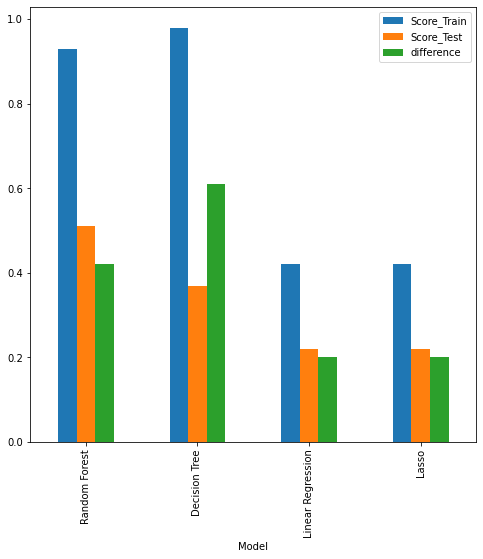

In [ ]:
model.plot(x='Model',y=['Score_Train','Score_Test','difference'],kind='bar',figsize=(8, 8))
plt.show()